In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [40]:

goal = 50
dice_sides = 6

# Non-terminal states
states = []
for i in range(goal):
    for j in range(goal):
        for k in range(goal - i):
            states.append((i, j, k))

# Initialise value function
V = {s: 0 for s in states}
V_roll = {s: 0 for s in states}
V_hold = {s: 0 for s in states}

# Initialise convergence parameter
epsilon = 1e-6

while True:

    delta = 0
    new_V = {}
    new_V_roll = {}
    new_V_hold = {}

    for s in states:
        i, j, k = s

        # The player can hold and win
        if i + k >= goal:
            new_V[s] = 1
            new_V_roll[s] = 0
            new_V_hold[s] = 1

        # If not a win
        else:
            # Roll: 0.5 chance to get a tail (turn passes), 0.5 chance to increment k
            # If a tail: (i, j, k) -> (j, i, 0) - remove turn points (k=0) and swap i and j (ending turn)
            # If a head: (i, j, k) -> (i, j, k + 1) - add a turn point (k += 1)

            if i + k + dice_sides >= goal:
                r_star = goal - i - k # 4

                roll_val = (1 / dice_sides) * (
                    (1 - V[(j, i, 0)])
                    + sum(V[(i, j, k + r)] for r in range(2, r_star)) # 2, 3
                    + min(1 * (dice_sides - r_star + 1), dice_sides - 1) # 3
                )
            else:
                roll_val = (1 / dice_sides) * (
                    (1 - V[(j, i, 0)])
                    + sum(V[(i, j, k + r)] for r in range(2, dice_sides + 1))
                )

            # Hold: turn passes with i+k added to score
            if i + k >= goal:
                hold_val = 1
            else:
                # (i, j, k) -> (j, i + k, 0)
                # First bank the points and reset turn total: (i, j, k) -> (i + k, j, 0)
                # Since "hold" action was taken, switch players: (j, i + k, 0)
                hold_val = 1 - V[(j, i + k, 0)]

            new_V[s] = max(roll_val, hold_val)
            new_V_roll[s] = roll_val
            new_V_hold[s] = hold_val

            delta = max(delta, abs(new_V[s] - V[s]))

    V = new_V
    V_roll = new_V_roll
    V_hold = new_V_hold


    if delta < epsilon:
        break

#print("Win probabilities:", V)
#print(min(V.values()))
#print(max(V.values()))
#print(V_roll[(4,5,25)])
#print(V_hold[(4,5,25)])


optimal_values = {}
for s in states:
    i, j, k = s
    optimal_values[s] = max(V_roll[s], V_hold[s])
#print(optimal_values)


best_k_for_roll = {}

for i in range(goal):
    for j in range(goal):
        max_val = float('-inf')
        best_k = 0
        for k in range(goal - i):
            s = (i, j, k)
            if V_roll[s] > max_val:
                max_val = V_roll[s]
                best_k = k
        best_k_for_roll[(i, j)] = best_k

#print(best_k_for_roll)

i, j = 0,0

for k in range(goal - i):  # valid k values so that (i + k) < goal
    print(f"k = {k}, V_roll[({i}, {j}, {k})] = {V_roll[(i, j, k)]}")
    print(f"k = {k}, V_hold[({i}, {j}, {k})] = {V_hold[(i, j, k)]}")

k = 0, V_roll[(0, 0, 0)] = 0.5461492479256778
k = 0, V_hold[(0, 0, 0)] = 0.4538508372832549
k = 1, V_roll[(0, 0, 1)] = 0.5504061639428166
k = 1, V_hold[(0, 0, 1)] = 0.4636414584594406
k = 2, V_roll[(0, 0, 2)] = 0.5548612677028677
k = 2, V_hold[(0, 0, 2)] = 0.47376480223638895
k = 3, V_roll[(0, 0, 3)] = 0.559515250115886
k = 3, V_hold[(0, 0, 3)] = 0.48385052551678986
k = 4, V_roll[(0, 0, 4)] = 0.5643791026608379
k = 4, V_hold[(0, 0, 4)] = 0.4942153431840933
k = 5, V_roll[(0, 0, 5)] = 0.5694746674633815
k = 5, V_hold[(0, 0, 5)] = 0.5048803487807678
k = 6, V_roll[(0, 0, 6)] = 0.5748149328007168
k = 6, V_hold[(0, 0, 6)] = 0.515864623829897
k = 7, V_roll[(0, 0, 7)] = 0.580402802418208
k = 7, V_hold[(0, 0, 7)] = 0.5269645229999406
k = 8, V_roll[(0, 0, 8)] = 0.5862459157826078
k = 8, V_hold[(0, 0, 8)] = 0.5379635144484249
k = 9, V_roll[(0, 0, 9)] = 0.592303041880538
k = 9, V_hold[(0, 0, 9)] = 0.5488371947840838
k = 10, V_roll[(0, 0, 10)] = 0.598657818496413
k = 10, V_hold[(0, 0, 10)] = 0.5597

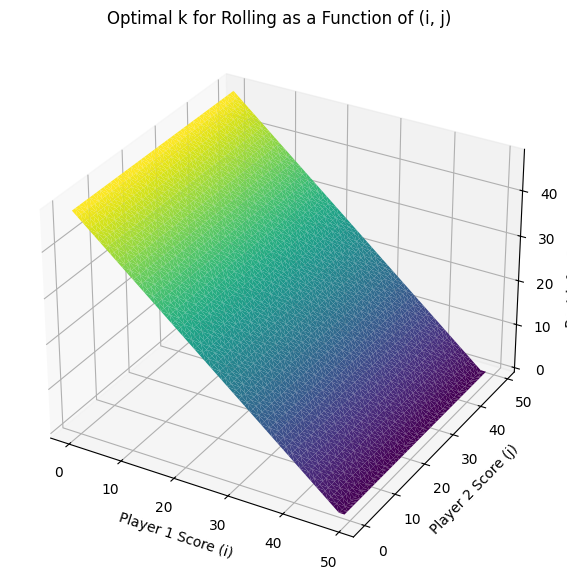

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extract data
i_vals = []
j_vals = []
k_vals = []

for (i, j), k in best_k_for_roll.items():
    i_vals.append(i)
    j_vals.append(j)
    k_vals.append(k)

# Convert to numpy arrays
i_vals = np.array(i_vals)
j_vals = np.array(j_vals)
k_vals = np.array(k_vals)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# You can use scatter or trisurf. Here's trisurf for smoother surface:
ax.plot_trisurf(i_vals, j_vals, k_vals, cmap='viridis', edgecolor='none')

# Label axes
ax.set_xlabel("Player 1 Score (i)")
ax.set_ylabel("Player 2 Score (j)")
ax.set_zlabel("Best k for Roll Action")

ax.set_title("Optimal k for Rolling as a Function of (i, j)")

plt.show()
